In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-27 15:35:06.097590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-27 15:35:06.097636: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load and Subset Data

<Item title:"SAC_Photo_Monitoring" type:Feature Layer Collection owner:Anooshi>
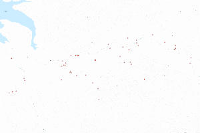

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('b21f668c32ad48f7bc5efae84f6d0008')

stations = output['data0']
obs = output['table0']
feature_service = output['feature_service']

In [3]:
# Merge related table and feature layer
data = stations.merge(obs, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Stations'])
data = data.rename(columns={ 'OBJECTID_x':'Station_ID','OBJECTID_y':'Obs_ID','GlobalID_y':'Record_GlobalID'})

In [4]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 52


# QAQC

In [5]:
validate_domains(feature_service)



Table/Layer:  Photo_Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor1,"{Joy Stewart, Janel Mayo}"
0,Surveyor2,"{Jackson Sabol, Joy Stewart, Janel Mayo}"




Table/Layer:  Photo_Stations


No Mismatches Found


In [6]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(data, exclude_cols=['Comments'], objectID = ['Obs_ObjectID'])



Analysis for: Camera_Make_Model
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Sensor_Size
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ISO
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Point_Latitude
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Aperture
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing

In [7]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Description','Surveyor2'])

No blank Camera_Make_Model
No blank Sensor_Size
No blank ISO
No blank Point_Latitude
No blank Obs_ID
No blank Aperture
No blank BHR_Site
No blank Azimuth_Degrees
Blank Focal_Length entrie(s) exist!


,Station_ID,BHR_Site,Feature_ID,Description,Habitat_Type,Mitigation_Type,Point_Latitude,Point_Longitude,Camera_Height_feet,Vertical_Camera_Angle_Degrees,Azimuth_Degrees,SHAPE,Obs_ID,Observation_Date,Surveyor1,Surveyor2,Camera_Make_Model,Sensor_Size,Focal_Length,Lens_Multiplication_Factor,F35_mm_Equivalent_Focal_Length,Shutter_Speed_seconds,Aperture,ISO,Comments,Record_GlobalID
99,25,SAC,22-1,None,sycamore riparian,establish/reestablish,37.58442,-121.79174,4.5,3,276,"{'x': 6187379.895021811, 'y': 2037845.8186541498, 'spatialReferenc...",287,2021-04-15 20:30:23,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,NaN,1.5,27.0,1/800,f/10,250,None,9a656cb9-5555-451a-b423-c01cc193d989


No blank SHAPE
No blank Vertical_Camera_Angle_Degrees
No blank Lens_Multiplication_Factor
No blank Shutter_Speed_seconds
No blank Record_GlobalID
No blank F35_mm_Equivalent_Focal_Length
No blank Camera_Height_feet
No blank Observation_Date
No blank Station_ID
No blank Point_Longitude
No blank Habitat_Type
No blank Feature_ID
No blank Surveyor1
Blank Comments entrie(s) exist!


,Station_ID,BHR_Site,Feature_ID,Description,Habitat_Type,Mitigation_Type,Point_Latitude,Point_Longitude,Camera_Height_feet,Vertical_Camera_Angle_Degrees,Azimuth_Degrees,SHAPE,Obs_ID,Observation_Date,Surveyor1,Surveyor2,Camera_Make_Model,Sensor_Size,Focal_Length,Lens_Multiplication_Factor,F35_mm_Equivalent_Focal_Length,Shutter_Speed_seconds,Aperture,ISO,Comments,Record_GlobalID
3,1,SAC,10-1,W of Trib 5.1 (veg monitoring),oak savannah,establish/reestablish,37.58246,-121.79682,4.50,0,260,"{'x': 6185897.601726547, 'y': 2037154.7790257335, 'spatialReferenc...",291,2021-04-16 17:04:28,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/1250,f/10,360,None,1affdb10-c595-4cc8-afab-be4e307440a1
35,9,SAC,13-1,None,oak woodland,rehabilitate,37.58475,-121.79441,4.25,8,250,"{'x': 6186606.849979967, 'y': 2037979.945682481, 'spatialReference...",286,2021-04-15 20:11:43,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/320,f/10,100,None,2e2321a6-1096-4edf-a946-0c1fa07ba998
43,11,SAC,14-1,From N edge,open water,enhancement,37.58218,-121.79144,4.50,0,148,"{'x': 6187467.276080638, 'y': 2037038.0299153924, 'spatialReferenc...",283,2021-04-15 19:23:50,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/500,f/9,180,None,ec5f78d9-fff2-431b-a8ee-c6034bfa6839
59,15,SAC,16-2,None,riparian scrub,enhancement,37.57682,-121.79599,5.50,0,192,"{'x': 6186105.444814801, 'y': 2035066.4374018908, 'spatialReferenc...",275,2021-04-15 17:34:33,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/1000,f/10,450,None,213c07a6-2d8a-4b09-a536-4dc5fa05699f
63,16,SAC,17-1,Small patch of mulefat w/ art. cal. at mouth of canyon w/ Upland s...,riparian scrub,enhancement,37.58306,-121.80035,4.33,8,344,"{'x': 6184879.874103218, 'y': 2037387.3894528896, 'spatialReferenc...",294,2021-04-16 17:47:58,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/640,f/10,360,None,6faf6100-a3b0-466e-a6e7-03b1f9e96b6e
91,23,SAC,2-2,Trib 5.1 (veg monitoring),ephemeral stream,enhancement,37.58245,-121.79668,4.60,-12,156,"{'x': 6185936.696792722, 'y': 2037152.780670151, 'spatialReference...",289,2021-04-16 16:48:00,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/500,f/11,220,None,8cd3b7b1-6f1b-4c13-86e1-0c035b231ec4
99,25,SAC,22-1,None,sycamore riparian,establish/reestablish,37.58442,-121.79174,4.50,3,276,"{'x': 6187379.895021811, 'y': 2037845.8186541498, 'spatialReferenc...",287,2021-04-15 20:30:23,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,NaN,1.5,27.0,1/800,f/10,250,None,9a656cb9-5555-451a-b423-c01cc193d989
103,26,SAC,22-2,None,sycamore riparian,establish/reestablish,37.58307,-121.79986,4.40,0,222,"{'x': 6185021.302626133, 'y': 2037387.9737693071, 'spatialReferenc...",292,2021-04-16 17:23:58,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/1000,f/11,500,None,adf3e154-4a99-4486-bd55-c0bfd81c0274
119,30,SAC,24-2,S of/across creek from feature,upland scrub,enhancement,37.58304,-121.79999,4.50,15,13,"{'x': 6184983.784656554, 'y': 2037378.2985918075, 'spatialReferenc...",293,2021-04-16 17:32:07,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/1000,f/8,250,None,53dc4dea-5c34-4f47-b005-7c9235f3833f
143,36,SAC,28-2,"Downstream from Trib 4.1 mouth, S side taken from top of steep bank",willow riparian,establish/reestablish,37.58150,-121.80294,4.54,-10,338,"{'x': 6184120.080347225, 'y': 2036829.1615667343, 'spatialReferenc...",298,2021-04-16 18:52:03,Kurt Lutz,None,Nikon D3500,23.5 x 15.6,18.0,1.5,27.0,1/320,f/10,220,None,4655efd1-4261-4aaf-a0d8-284a2857506c


No blank Mitigation_Type


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


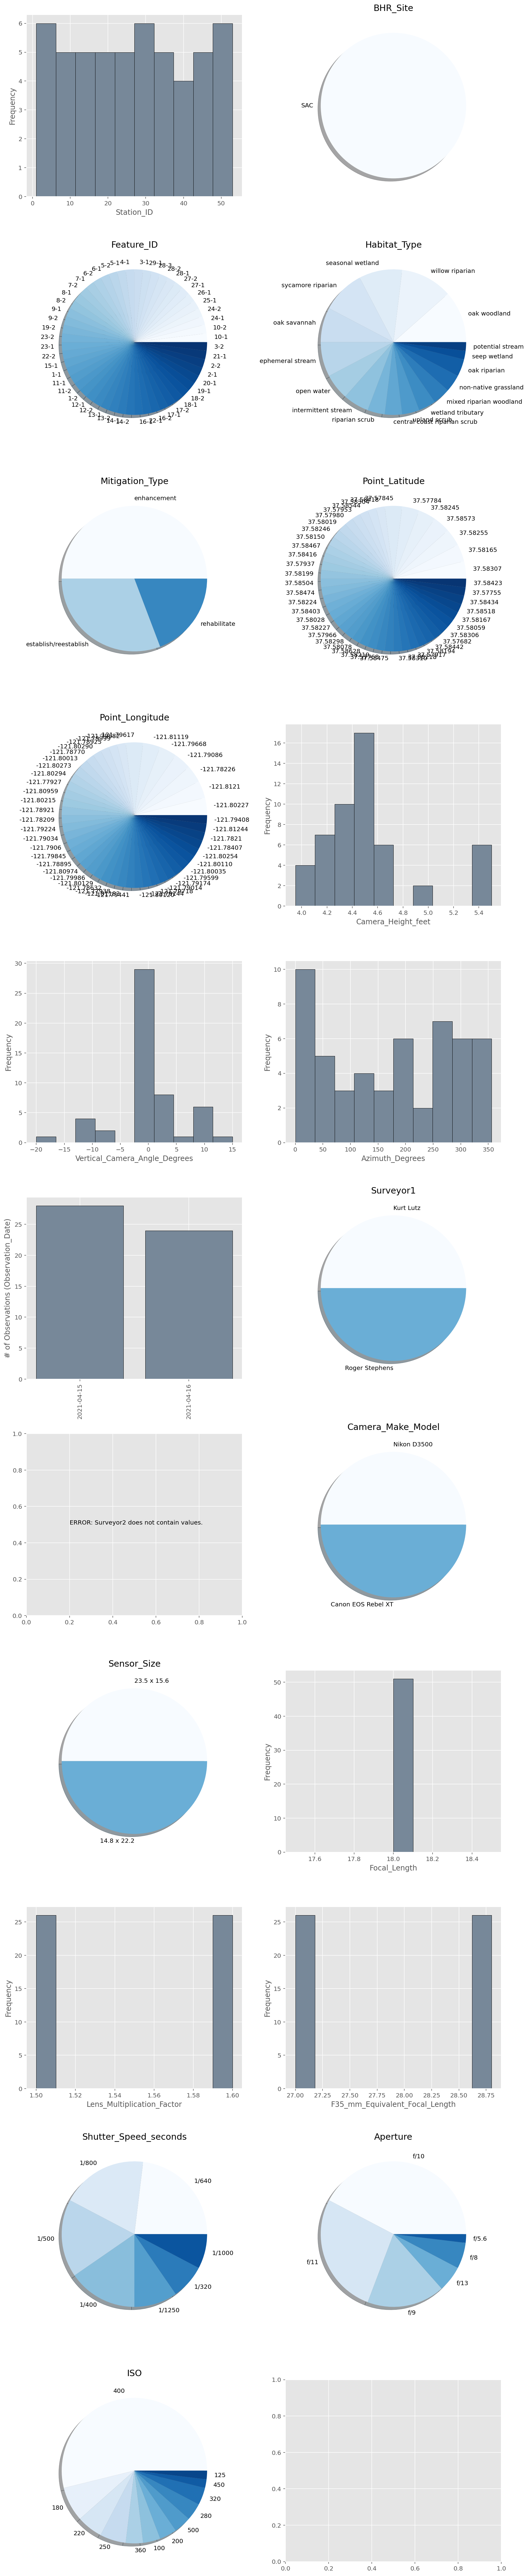

In [8]:
QAQC_plot(sub, ['Station_ID','BHR_Site', 'Feature_ID',
       'Habitat_Type', 'Mitigation_Type', 'Point_Latitude', 'Point_Longitude',
       'Camera_Height_feet', 'Vertical_Camera_Angle_Degrees',
       'Azimuth_Degrees', 'Observation_Date',
       'Surveyor1', 'Surveyor2', 'Camera_Make_Model', 'Sensor_Size',
       'Focal_Length', 'Lens_Multiplication_Factor',
       'F35_mm_Equivalent_Focal_Length', 'Shutter_Speed_seconds', 'Aperture',
       'ISO'])

In [9]:
#Check filenames of photos
QAQC_attachment_filenames(feature_service)
#detecting all becaus filename has "photo" in it. Still worthwile to look through the print out of all the filenames.


No attachments for layer/table Photo_Stations


Found mislabeled photo attachement(s):
Photo_Observations
Object ID: 105  Current Name:  SAC_PhotoMonitoring_20180419_Point 10-1.jpg
Object ID: 106  Current Name:  SAC_PhotoMonitoring_20180420_Point 10-2.jpg


Object ID: 107  Current Name:  SAC_PhotoMonitoring_20180420_Point 1-1.jpg
Object ID: 108  Current Name:  SAC_PhotoMonitoring_20180420_Point 11-1.JPG


Object ID: 109  Current Name:  SAC_PhotoMonitoring_20180420_Point 11-2.JPG
Object ID: 110  Current Name:  SAC_PhotoMonitoring_20180420_Point 1-2.jpg


Object ID: 111  Current Name:  SAC_PhotoMonitoring_20180420_Point 12-1.JPG


Object ID: 112  Current Name:  SAC_PhotoMonitoring_20180420_Point 12-2.jpg
Object ID: 113  Current Name:  SAC_PhotoMonitoring_20180420_Point 13-1.jpg
Object ID: 114  Current Name:  SAC_PhotoMonitoring_20180430_Point 13-2.JPG


Object ID: 115  Current Name:  SAC_PhotoMonitoring_20180420_Point 14-1.JPG
Object ID: 116  Current Name:  SAC_PhotoMonitoring_20180419_Point 14-2.JPG


Object ID: 117  Current Name:  SAC_PhotoMonitoring_20180419_Point 15-1.JPG
Object ID: 118  Current Name:  SAC_PhotoMonitoring_20180420_Point 16-1.JPG


Object ID: 119  Current Name:  SAC_PhotoMonitoring_20180419_Point 16-2.JPG
Object ID: 120  Current Name:  SAC_PhotoMonitoring_20180419_Point 17-1.jpg
Object ID: 121  Current Name:  SAC_PhotoMonitoring_20180419_Point 17-2.JPG


Object ID: 122  Current Name:  SAC_PhotoMonitoring_20180419_Point 18-1.JPG
Object ID: 123  Current Name:  SAC_PhotoMonitoring_20180420_Point 18-2.jpg
Object ID: 124  Current Name:  SAC_PhotoMonitoring_20180419_Point 19-1.JPG


Object ID: 125  Current Name:  SAC_PhotoMonitoring_20180420_Point 20-1.JPG
Object ID: 126  Current Name:  SAC_PhotoMonitoring_20180420_Point 2-1.JPG
Object ID: 127  Current Name:  SAC_PhotoMonitoring_20180419_Point 2-2.jpg


Object ID: 128  Current Name:  SAC_PhotoMonitoring_20180504_Point 21-1.JPG
Object ID: 129  Current Name:  SAC_PhotoMonitoring_20180420_Point 22-1.JPG
Object ID: 130  Current Name:  SAC_PhotoMonitoring_20180419_Point 22-2.jpg


Object ID: 131  Current Name:  SAC_PhotoMonitoring_20180430_Point 23-1.JPG
Object ID: 132  Current Name:  SAC_PhotoMonitoring_20180420_Point 23-2.JPG


Object ID: 133  Current Name:  SAC_PhotoMonitoring_20180420_Point 24-1.JPG
Object ID: 134  Current Name:  SAC_PhotoMonitoring_20180419_Point 24-2.jpg
Object ID: 135  Current Name:  SAC_PhotoMonitoring_20180420_Point 25-1.JPG


Object ID: 136  Current Name:  SAC_PhotoMonitoring_20180419_Point 26-1.jpg
Object ID: 137  Current Name:  SAC_PhotoMonitoring_20180420_Point 27-1.JPG


Object ID: 138  Current Name:  SAC_PhotoMonitoring_20180419_Point 27-2.JPG
Object ID: 139  Current Name:  SAC_PhotoMonitoring_20180430_Point 28-1.JPG
Object ID: 140  Current Name:  SAC_PhotoMonitoring_20180419_Point 28-2.JPG


Object ID: 141  Current Name:  SAC_PhotoMonitoring_20180419_Point 28-3.JPG
Object ID: 142  Current Name:  SAC_PhotoMonitoring_20180419_Point 29-1.JPG


Object ID: 143  Current Name:  SAC_PhotoMonitoring_20180420_Point 3-1.JPG
Object ID: 144  Current Name:  SAC_PhotoMonitoring_20180420_Point 3-2.JPG


Object ID: 145  Current Name:  SAC_PhotoMonitoring_20180504_Point 4-1.JPG
Object ID: 146  Current Name:  SAC_PhotoMonitoring_20180419_Point 5-1.JPG
Object ID: 147  Current Name:  SAC_PhotoMonitoring_20180420_Point 5-2.JPG


Object ID: 148  Current Name:  SAC_PhotoMonitoring_20180420_Point 6-1.JPG


Object ID: 149  Current Name:  SAC_PhotoMonitoring_20180420_Point 6-2.JPG


Object ID: 150  Current Name:  SAC_PhotoMonitoring_20180420_Point 7-1.JPG
Object ID: 151  Current Name:  SAC_PhotoMonitoring_20180419_Point 7-2.JPG
Object ID: 152  Current Name:  SAC_PhotoMonitoring_20180419_Point 8-1.jpg


Object ID: 153  Current Name:  SAC_PhotoMonitoring_20180419_Point 8-2.JPG
Object ID: 154  Current Name:  SAC_PhotoMonitoring_20180420_Point 9-1.JPG


Object ID: 155  Current Name:  SAC_PhotoMonitoring_20180419_Point 9-2.JPG
Object ID: 156  Current Name:  SAC_PhotoMonitoring_20180420_Point 19-2.JPG


Object ID: 157  Current Name:  SAC_PhotoMonitoring_20190418_Point 20-1.JPG
Object ID: 158  Current Name:  SAC_PhotoMonitoring_20190418_Point 2-1.JPG


Object ID: 159  Current Name:  SAC_PhotoMonitoring_20190418_Point 6-1.JPG
Object ID: 160  Current Name:  SAC_PhotoMonitoring_20190418_Point 24-1.JPG
Object ID: 161  Current Name:  SAC_PhotoMonitoring_20190418_Point 3-1.JPG


Object ID: 162  Current Name:  SAC_PhotoMonitoring_20190418_Point 23-1.JPG
Object ID: 163  Current Name:  SAC_PhotoMonitoring_20190418_Point 12-1.JPG
Object ID: 164  Current Name:  SAC_PhotoMonitoring_20190418_Point 25-1.JPG


Object ID: 165  Current Name:  SAC_PhotoMonitoring_20190418_Point 5-2.JPG
Object ID: 166  Current Name:  SAC_PhotoMonitoring_20190418_Point 23-2.JPG


Object ID: 167  Current Name:  SAC_PhotoMonitoring_20190418_Point 11-1.JPG
Object ID: 168  Current Name:  SAC_PhotoMonitoring_20190418_Point 11-2.JPG


Object ID: 169  Current Name:  SAC_PhotoMonitoring_20190418_Point 3-2.JPG
Object ID: 170  Current Name:  SAC_PhotoMonitoring_20190418_Point 9-1.JPG
Object ID: 171  Current Name:  SAC_PhotoMonitoring_20190418_Point 22-1.JPG


Object ID: 172  Current Name:  SAC_PhotoMonitoring_20190418_Point 13-1.JPG
Object ID: 173  Current Name:  SAC_PhotoMonitoring_20190418_Point 19-2.JPG


Object ID: 174  Current Name:  SAC_PhotoMonitoring_20190418_Point 2-2.JPG
Object ID: 175  Current Name:  SAC_PhotoMonitoring_20190418_Point 8-1.JPG


Object ID: 176  Current Name:  SAC_PhotoMonitoring_20190418_Point 10-1.JPG
Object ID: 177  Current Name:  SAC_PhotoMonitoring_20190418_Point 6-2.JPG
Object ID: 178  Current Name:  SAC_PhotoMonitoring_20190418_Point 14-1.JPG


Object ID: 179  Current Name:  SAC_PhotoMonitoring_20190418_Point 7-1.JPG
Object ID: 180  Current Name:  SAC_PhotoMonitoring_20190419_Point 16-1.JPG
Object ID: 181  Current Name:  SAC_PhotoMonitoring_20190419_Point 27-1.JPG


Object ID: 182  Current Name:  SAC_PhotoMonitoring_20190419_Point 9-2.JPG
Object ID: 183  Current Name:  SAC_PhotoMonitoring_20190419_Point 14-2.JPG


Object ID: 184  Current Name:  SAC_PhotoMonitoring_20190419_Point 7-2.JPG
Object ID: 185  Current Name:  SAC_PhotoMonitoring_20190419_Point 18-1.JPG


Object ID: 186  Current Name:  SAC_PhotoMonitoring_20190419_Point 16-2.JPG
Object ID: 187  Current Name:  SAC_PhotoMonitoring_20190419_Point 27-2.JPG
Object ID: 188  Current Name:  SAC_PhotoMonitoring_20190419_Point 17-2.JPG


Object ID: 189  Current Name:  SAC_PhotoMonitoring_20190419_Point 15-1.JPG
Object ID: 190  Current Name:  SAC_PhotoMonitoring_20190419_Point 8-2.JPG
Object ID: 191  Current Name:  SAC_PhotoMonitoring_20190419_Point 28-2.JPG


Object ID: 192  Current Name:  SAC_PhotoMonitoring_20190419_Point 29-1.JPG
Object ID: 193  Current Name:  SAC_PhotoMonitoring_20190419_Point 28-1.JPG
Object ID: 194  Current Name:  SAC_PhotoMonitoring_20190419_Point 19-1.JPG


Object ID: 195  Current Name:  SAC_PhotoMonitoring_20190419_Point 5-1.JPG
Object ID: 196  Current Name:  SAC_PhotoMonitoring_20190419_Point 28-3.JPG
Object ID: 197  Current Name:  SAC_PhotoMonitoring_20190419_Point 13-2.JPG


Object ID: 198  Current Name:  SAC_PhotoMonitoring_20190419_Point 17-1.JPG
Object ID: 199  Current Name:  SAC_PhotoMonitoring_20190419_Point 22-2.JPG
Object ID: 200  Current Name:  SAC_PhotoMonitoring_20190419_Point 24-2.JPG


Object ID: 201  Current Name:  SAC_PhotoMonitoring_20190419_Point 26-1.JPG
Object ID: 202  Current Name:  SAC_PhotoMonitoring_20190419_Point 18-2.JPG


Object ID: 203  Current Name:  SAC_PhotoMonitoring_20190419_Point 12-2.JPG
Object ID: 204  Current Name:  SAC_PhotoMonitoring_20190419_Point 10-2.JPG


Object ID: 205  Current Name:  SAC_PhotoMonitoring_20190419_Point 1-1.JPG
Object ID: 206  Current Name:  SAC_PhotoMonitoring_20190419_Point 1-2.JPG


Object ID: 207  Current Name:  SAC_PhotoMonitoring_20190812_Point 4-1.JPG
Object ID: 208  Current Name:  SAC_PhotoMonitoring_20190812_Point 21-1.JPG
Object ID: 209  Current Name:  SAC_PhotoMonitoring_20200415_Point_12-1.jpeg


Object ID: 210  Current Name:  SAC_PhotoMonitoring_20200415_Point_23-1.jpeg
Object ID: 211  Current Name:  SAC_PhotoMonitoring_20200415_Point_3-1.jpeg
Object ID: 212  Current Name:  SAC_PhotoMonitoring_20200415_Point_2-1.jpeg


Object ID: 213  Current Name:  SAC_PhotoMonitoring_20200415_Point_6-1.jpeg
Object ID: 214  Current Name:  SAC_PhotoMonitoring_20200415_Point_24-1.jpeg
Object ID: 215  Current Name:  SAC_PhotoMonitoring_20200415_Point_20-1.jpeg


Object ID: 216  Current Name:  SAC_PhotoMonitoring_20200415_Point_25-1.jpeg
Object ID: 217  Current Name:  SAC_PhotoMonitoring_20200415_Point_11-2.jpeg


Object ID: 218  Current Name:  SAC_PhotoMonitoring_20200415_Point_3-2.jpeg
Object ID: 219  Current Name:  SAC_PhotoMonitoring_20200415_Point_11-1.jpeg


Object ID: 220  Current Name:  SAC_PhotoMonitoring_20200415_Point_27-1.jpg
Object ID: 222  Current Name:  SAC_PhotoMonitoring_20200415_Point_7-1.jpg


Object ID: 223  Current Name:  SAC_PhotoMonitoring_20200415_Point_14-1.jpg


Object ID: 224  Current Name:  SAC_PhotoMonitoring_20200415_Point_6-2.jpg
Object ID: 225  Current Name:  SAC_PhotoMonitoring_20200415_Point_22-1.jpg


Object ID: 226  Current Name:  SAC_PhotoMonitoring_20200415_Point_9-1.jpg
Object ID: 227  Current Name:  SAC_PhotoMonitoring_20200415_Point_23-2.jpg
Object ID: 228  Current Name:  SAC_PhotoMonitoring_20200415_Point_7-2.jpg


Object ID: 229  Current Name:  SAC_PhotoMonitoring_20200415_Point_18-1.jpg
Object ID: 230  Current Name:  SAC_PhotoMonitoring_20200415_Point_16-2.jpg


Object ID: 231  Current Name:  SAC_PhotoMonitoring_20200415_Point_14-2.jpg


Object ID: 232  Current Name:  SAC_PhotoMonitoring_20200415_Point_9-2.jpg
Object ID: 233  Current Name:  SAC_PhotoMonitoring_20200415_Point_2-2.jpg


Object ID: 234  Current Name:  SAC_PhotoMonitoring_20200415_Point_8-1.jpg


Object ID: 235  Current Name:  SAC_PhotoMonitoring_20200415_Point_10-1.jpg
Object ID: 236  Current Name:  SAC_PhotoMonitoring_20200416_Point_5-2.jpg
Object ID: 237  Current Name:  SAC_PhotoMonitoring_20200416_Point_19-2.jpg


Object ID: 238  Current Name:  SAC_PhotoMonitoring_20200416_Point_13-1.jpg
Object ID: 239  Current Name:  SAC_PhotoMonitoring_20200416_Point_22-2.jpg


Object ID: 240  Current Name:  SAC_PhotoMonitoring_20200416_Point_24-2.jpg
Object ID: 241  Current Name:  SAC_PhotoMonitoring_20200416_Point_17-1.jpg


Object ID: 242  Current Name:  SAC_PhotoMonitoring_20200416_Point_13-2.jpg


Object ID: 243  Current Name:  SAC_PhotoMonitoring_20200416_Point_28-3.jpg
Object ID: 244  Current Name:  SAC_PhotoMonitoring_20200416_Point_5-1.jpg
Object ID: 245  Current Name:  SAC_PhotoMonitoring_20200416_Point_28-1.jpg


Object ID: 246  Current Name:  SAC_PhotoMonitoring_20200416_Point_29-1.jpg
Object ID: 247  Current Name:  SAC_PhotoMonitoring_20200416_Point_19-1.jpg


Object ID: 248  Current Name:  SAC_PhotoMonitoring_20200416_Point_28-2.jpg
Object ID: 249  Current Name:  SAC_PhotoMonitoring_20200415_Point_8-2.jpg


Object ID: 250  Current Name:  SAC_PhotoMonitoring_20200415_Point_15-1.jpg
Object ID: 251  Current Name:  SAC_PhotoMonitoring_20200416_Point_18-2.jpeg


Object ID: 252  Current Name:  SAC_PhotoMonitoring_20200416_Point_12-2.jpeg


Object ID: 253  Current Name:  SAC_PhotoMonitoring_20200416_Point_10-2.jpeg
Object ID: 254  Current Name:  SAC_PhotoMonitoring_20200416_Point_1-1.jpeg


Object ID: 255  Current Name:  SAC_PhotoMonitoring_20200416_Point_1-2.jpeg
Object ID: 256  Current Name:  SAC_PhotoMonitoring_20200416_Point_26-1.jpeg
Object ID: 257  Current Name:  SAC_PhotoMonitoring_20200416_Point_27-2.jpeg


Object ID: 258  Current Name:  SAC_PhotoMonitoring_20200416_Point_17-2.jpeg


Object ID: 259  Current Name:  SAC_PhotoMonitoring_20200806_Point_4-1.jpeg
Object ID: 260  Current Name:  SAC_PhotoMonitoring_20200806_Point_21-1.jpeg


Object ID: 261  Current Name:  SAC_PhotoMonitoring_20210415_Point_12-1.jpeg
Object ID: 262  Current Name:  SAC_PhotoMonitoring_20210415_Point_23-1.jpeg


Object ID: 263  Current Name:  SAC_PhotoMonitoring_20210415_Point_24-1.jpeg
Object ID: 264  Current Name:  SAC_PhotoMonitoring_20210415_Point_3-1.jpeg


Object ID: 265  Current Name:  SAC_PhotoMonitoring_20210415_Point_2-1.jpeg
Object ID: 266  Current Name:  SAC_PhotoMonitoring_20210415_Point_6-1.jpeg


Object ID: 267  Current Name:  SAC_PhotoMonitoring_20210415_Point_20-1.jpeg
Object ID: 268  Current Name:  SAC_PhotoMonitoring_20210415_Point_11-1.jpeg
Object ID: 269  Current Name:  SAC_PhotoMonitoring_20210415_Point_25-1.jpeg


Object ID: 270  Current Name:  SAC_PhotoMonitoring_20210415_Point_11-2.jpeg
Object ID: 271  Current Name:  SAC_PhotoMonitoring_20210415_Point_3-2.jpeg


Object ID: 272  Current Name:  SAC_PhotoMonitoring_20210415_Point_5-2.jpeg
Object ID: 273  Current Name:  SAC_PhotoMonitoring_20210415_Point_23-2.jpeg


Object ID: 274  Current Name:  SAC_PhotoMonitoring_20210415_Point_26-1.jpeg
Object ID: 275  Current Name:  SAC_PhotoMonitoring_20210415_Point_16-2.jpg


Object ID: 276  Current Name:  SAC_PhotoMonitoring_20210415_Point_18-1.jpg
Object ID: 277  Current Name:  SAC_PhotoMonitoring_20210415_Point_7-2.jpg


Object ID: 278  Current Name:  SAC_PhotoMonitoring_20210415_Point_14-2.jpg
Object ID: 279  Current Name:  SAC_PhotoMonitoring_20210415_Point_9-2.jpg


Object ID: 280  Current Name:  SAC_PhotoMonitoring_20210415_Point_27-1.jpg
Object ID: 281  Current Name:  SAC_PhotoMonitoring_20210415_Point_16-1.jpg
Object ID: 282  Current Name:  SAC_PhotoMonitoring_20210415_Point_7-1.jpg


Object ID: 283  Current Name:  SAC_PhotoMonitoring_20210415_Point_14-1.jpg
Object ID: 284  Current Name:  SAC_PhotoMonitoring_20210415_Point_6-2.jpg


Object ID: 285  Current Name:  SAC_PhotoMonitoring_20210415_Point_19-2.jpg
Object ID: 286  Current Name:  SAC_PhotoMonitoring_20210415_Point_13-1.jpg
Object ID: 287  Current Name:  SAC_PhotoMonitoring_20210415_Point_22-1.jpg


Object ID: 288  Current Name:  SAC_PhotoMonitoring_20210415_Point_9-1.jpg
Object ID: 289  Current Name:  SAC_PhotoMonitoring_20210416_Point_2-2.jpg


Object ID: 290  Current Name:  SAC_PhotoMonitoring_20210416_Point_8-1.jpg
Object ID: 291  Current Name:  SAC_PhotoMonitoring_20210416_Point_10-1.jpg
Object ID: 292  Current Name:  SAC_PhotoMonitoring_20210416_Point_22-2.jpg


Object ID: 293  Current Name:  SAC_PhotoMonitoring_20210416_Point_24-2.jpg
Object ID: 294  Current Name:  SAC_PhotoMonitoring_20210416_Point_17-1.jpg


Object ID: 295  Current Name:  SAC_PhotoMonitoring_20210416_Point_13-2.jpg
Object ID: 296  Current Name:  SAC_PhotoMonitoring_20210416_Point_28-3.jpg
Object ID: 297  Current Name:  SAC_PhotoMonitoring_20210416_Point_5-1.jpg


Object ID: 298  Current Name:  SAC_PhotoMonitoring_20210416_Point_28-2.jpg


Object ID: 299  Current Name:  SAC_PhotoMonitoring_20210416_Point_28-1.jpg
Object ID: 300  Current Name:  SAC_PhotoMonitoring_20210416_Point_29-1.jpg


Object ID: 301  Current Name:  SAC_PhotoMonitoring_20210416_Point_4-1.jpeg
Object ID: 302  Current Name:  SAC_PhotoMonitoring_20210416_Point_21-1.jpeg
Object ID: 303  Current Name:  SAC_PhotoMonitoring_20210416_Point_1-1.jpeg


Object ID: 304  Current Name:  SAC_PhotoMonitoring_20210416_Point_1-2.jpeg
Object ID: 305  Current Name:  SAC_PhotoMonitoring_20210416_Point_18-2.jpeg
Object ID: 306  Current Name:  SAC_PhotoMonitoring_20210416_Point_12-2.jpeg


Object ID: 307  Current Name:  SAC_PhotoMonitoring_20210416_Point_10-2.jpeg
Object ID: 308  Current Name:  SAC_PhotoMonitoring_20210416_Point_27-2.jpeg
Object ID: 309  Current Name:  SAC_PhotoMonitoring_20210416_Point_17-2.jpeg


Object ID: 310  Current Name:  SAC_PhotoMonitoring_20210416_Point_15-1.jpeg
Object ID: 311  Current Name:  SAC_PhotoMonitoring_20210416_Point_8-2.jpeg


Object ID: 312  Current Name:  SAC_PhotoMonitoring_20210416_Point_19-1.jpeg


# Export Excel Data Deliverable

In [10]:
data.columns

Index(['Station_ID', 'BHR_Site', 'Feature_ID', 'Description', 'Habitat_Type',
       'Mitigation_Type', 'Point_Latitude', 'Point_Longitude',
       'Camera_Height_feet', 'Vertical_Camera_Angle_Degrees',
       'Azimuth_Degrees', 'SHAPE', 'Obs_ID', 'Observation_Date', 'Surveyor1',
       'Surveyor2', 'Camera_Make_Model', 'Sensor_Size', 'Focal_Length',
       'Lens_Multiplication_Factor', 'F35_mm_Equivalent_Focal_Length',
       'Shutter_Speed_seconds', 'Aperture', 'ISO', 'Comments',
       'Record_GlobalID'],
      dtype='object')

In [11]:
field_order = ['BHR_Site',
'Observation_Date',
'Surveyor1', 
'Surveyor2',
'Feature_ID',
'Description',
'Habitat_Type',
'Mitigation_Type',  
'Point_Latitude',
'Point_Longitude',
'Camera_Height_feet',
'Vertical_Camera_Angle_Degrees',
'Azimuth_Degrees',
'Camera_Make_Model',
'Sensor_Size',
'Focal_Length',
'Lens_Multiplication_Factor',
'F35_mm_Equivalent_Focal_Length',
'Shutter_Speed_seconds',
'Aperture',
'ISO',
'Comments',
'Station_ID',
'Obs_ID',
'Record_GlobalID', 
 'SHAPE',    
]

In [12]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Photo_Monitoring' )

Exported to Outputs/SAC_Photo_Monitoring_Data_20211027.xlsx
